# PROJECT: INVENTORY OPTIMIZATION



**AUTHOR**       **:** Muhammad Aqhari Nasrin Bin Ramli

**E-mail**       **:** muhammad.aqhari.nasrin@gmail.com

**LinkedIn**     **:** [Muhammad Aqhari Nasrin Bin Ramli](https://www.linkedin.com/in/muhammad-aqhari-nasrin-bin-ramli/)

**DATA SOURCE**  **:** [Data Set](https://data.mendeley.com/datasets/8gx2fvg2k6/5)

In [1]:
!pip install pycountry_convert
!pip install googletrans==4.0.0-rc1

In [2]:
pip install prophet

# IMPORTING LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from tabulate import tabulate
import statsmodels.stats.api as sms
import scipy.stats as stats
from scipy.stats import skew
import plotly.express as px
from googletrans import Translator
from IPython.core.display import HTML
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
%matplotlib inline 
from sklearn.preprocessing import StandardScaler
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")


# LOADING DATA

In [4]:
data = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


In [5]:
data.head(10)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,EE. UU.,XXXXXXXXX,Kimberly,19488,Flowers,XXXXXXXXX,Consumer,NY,2122 Hazy Corner,14150.0,2,Fitness,43.013969,-78.879066,Pacific Asia,Toowoomba,Australia,19488,1/13/2018 11:03,75935,1360,32.779999,0.10,179250,327.75,0.06,1,327.75,294.980011,18.580000,Oceania,Queensland,CANCELED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/19/2018 11:03,Standard Class
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Constance,19487,Terrell,XXXXXXXXX,Home Office,PR,1879 Green Pine Bank,725.0,2,Fitness,18.242538,-66.037056,Pacific Asia,Guangzhou,China,19487,1/13/2018 10:42,75934,1360,39.330002,0.12,179249,327.75,

In [6]:
data.tail(10)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
180509,PAYMENT,3,4,0.000000,335.980011,Advance shipping,0,45,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Melissa,7,Wilcox,XXXXXXXXX,Corporate,PR,9453 High Concession,725.0,7,Fan Shop,18.359095,-66.079956,Pacific Asia,Guangshui,China,7,1/16/2016 6:49,26052,1004,64.0,0.16,65202,399.980011,0.00,1,399.980011,335.980011,0.000000,Eastern Asia,Hubei,PENDING_PAYMENT,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 6:49,Standard Class
180510,PAYMENT,3,4,165.990005,331.980011,Advance shipping,0,45,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Melissa,7,Wilcox,XXXXXXXXX,Corporate,PR,9453 High Concession,725.0,7,Fan Shop,18.359095,-66.079956,Pacific Asia,Guangshui,China,7,1/16/2016 6:49,26052,1004,68.0,0.17,65201,399.980011,0.50,1,399.980011,331.980011,165.990005,Eastern Asia,Hubei,PENDING_PAYMENT,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 6:49,Standard Class
180511,DEBIT,2,2,157.429993,327.980011,Shipping on time,0,45,Fishing,Chula Vista,EE. UU.,XXXXXXXXX,Olivia,9314,Smith,XXXXXXXXX,Consumer,CA,3760 Stony Promenade,91911.0,7,Fan Shop,32.611141,-117.073662,Pacific Asia,Chengdu,China,9314,1/16/2016 6:28,26051,1004,72.0,0.18,65195,399.980011,0.48,1,399.980011,327.980011,157.429993,Eastern Asia,Sichuan,ON_HOLD,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 6:28,Second Class
180512,DEBIT,6,4,86.400002,319.980011,Late delivery,1,45,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Mary,7396,Madden,XXXXXXXXX,Home Office,PR,9918 Lazy Cape,725.0,7,Fan Shop,18.245256,-66.370621,Pacific Asia,Chengdu,China,7396,1/16/2016 6:07,26050,1004,80.0,0.20,65194,399.980011,0.27,1,399.980011,319.980011,86.400002,Eastern Asia,Sichuan,COMPLETE,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/22/2016 6:07,Standard Class
180513,PAYMENT,3,4,119.989998,299.989990,Advance shipping,0,45,Fishing,Lancaster,EE. UU.,XXXXXXXXX,Mary,3080,Smith,XXXXXXXXX,Home Office,OH,8600 Red Goose Abbey,43130.0,7,Fan Shop,39.715977,-82.599297,Pacific Asia,Shanghái,China,3080,1/16/2016 5:04,26047,1004,100.0,0.25,65185,399.980011,0.40,1,399.980011,299.989990,119.989998,Eastern Asia,Shanghái,PENDING_PAYMENT,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 5:04,Standard Class
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.0,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,EE. UU.,XXXXXXXXX,Ronald,914

In [7]:
data.sample(10)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
131370,TRANSFER,5,4,28.719999,84.970001,Late delivery,1,46,Indoor/Outdoor Games,Norcross,EE. UU.,XXXXXXXXX,Mary,11987,Gentry,XXXXXXXXX,Consumer,GA,4669 Rustic Apple Grounds,30093.0,7,Fan Shop,33.963215,-84.181908,Pacific Asia,Bangkok,Tailandia,11987,3/9/2016 2:01,29669,1014,14.99,0.15,74221,49.980000,0.34,2,99.959999,84.970001,28.719999,Southeast Asia,Bangkok,PROCESSING,NaN,1014,46,NaN,http://images.acmesports.sports/O%27Brien+Men%...,O'Brien Men's Neoprene Life Vest,49.980000,0,3/14/2016 2:01,Standard Class
84303,DEBIT,5,4,44.639999,278.980011,Late delivery,1,43,Camping & Hiking,Encinitas,EE. UU.,XXXXXXXXX,Anthony,12142,Smith,XXXXXXXXX,Consumer,CA,7947 Sunny Pathway,92024.0,7,Fan Shop,33.045517,-117.264404,LATAM,Santo Domingo,República Dominicana,12142,1/23/2015 14:20,1549,957,21.00,0.07,3870,299.980011,0.16,1,299.980011,278.980011,44.639999,Caribbean,Santo Domingo,COMPLETE,NaN,957,43,NaN,http://images.acmesports.sports/Diamondback+Wo...,Diamondback Women's Serene Classic Comfort Bi,299.980011,0,1/28/2015 14:20,Standard Class
32628,PAYMENT,6,4,3.360000,33.570000,Late delivery,1,35,Golf Gloves,Endicott,EE. UU.,XXXXXXXXX,Rebecca,6050,Arnold,XXXXXXXXX,Consumer,NY,8775 Wishing Pony Byway,13760.0,6,Outdoors,42.074638,-76.124039,Europe,Sterlitamak,Rusia,6050,10/16/2016 4:20,44815,775,6.39,0.16,111950,9.990000,0.10,4,39.959999,33.570000,3.360000,Eastern Europe,Bashkortostán,PENDING_PAYMENT,NaN,775,35,NaN,http://images.acmesports.sports/Clicgear+8.0+S...,Clicgear 8.0 Shoe Brush,9.990000,0,10/22/2016 4:20,Standard Class
50418,DEBIT,6,4,-63.049999,126.089996,Late delivery,1,18,Men's Footwear,Sugar Land,EE. UU.,XXXXXXXXX,Stephanie,7908,Smith,XXXXXXXXX,Corporate,TX,9089 Round Willow Route,77478.0,4,Apparel,29.681074,-95.634163,Europe,Strasbourg,Francia,7908,9/29/2015 3:17,18575,403,3.90,0.03,46429,129.990005,-0.50,1,129.990005,126.089996,-63.049999,Western Europe,Alsacia-Champaña-Ardenas-Lorena,COMPLETE,NaN,403,18,NaN,http://images.acmesports.sports/Nike+Men%27s+C...,Nike Men's CJ Elite 2 TD Football Cleat,129.990005,0,10/5/2015 3:17,Standard Class
1330,PAYMENT,3,4,8.290000,110.489998,Advance shipping,0,18,Men's Footwear,Caguas,Puerto Rico,XXXXXXXXX,Zachary,2324,Smith,XXXXXXXXX,Home Office,PR,9279 Quaking Key,725.0,4,Apparel,18.247467,-66.370514,Africa,Abakaliki,Nigeria,2324,11/15/2016 17:15,46907,403,19.50,0.15,117254,129.990005,0.08,1,129.990005,110.489998,8.290000,West Africa,Ebonyi,PENDING_PAYMENT,NaN,403,18,NaN,http://images.acmesports.sports/Nike+Men%27s+C...,Nike Men's CJ Elite 2 TD Football Cleat,129.990005,0,11/18/2016 17:15,Standard Class
178946,PAYMENT,4,2,14.090000,74.970001,Late delivery,1,46,Indoor/Outdoor Games,Caguas,Puerto Rico,XXXXXXXXX,Mary,1167,Bentley,XXXXXXXXX,Corporate,PR,5674 Merry Nectar Pines,725.0,7,Fan Shop,18.276829,-66.370529,LATAM,Mixco,Guatemala,1167,4/7/2015 14:13,6618,1014,24.99,0.25,16537,49.980000,0.19,2,99.959999,74.970001,14.090000,Central America,Guatemala,PENDING_PAYMENT,NaN,1014,46,NaN,http://images.acmesports.sports/O%27Brien+Men%...,O'Brien Men's Neoprene Life Vest,49.980000,0,4/11/2015 14:13,Second Class
128576,DEBIT,3,4,51.020000,113.370003,Advan

In [8]:
data_description = pd.read_csv('DescriptionDataCoSupplyChain.csv')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

data_description['DESCRIPTION'] = data_description['DESCRIPTION'].str.replace(':', ' ')
data_description = data_description.style.set_properties(subset=['DESCRIPTION'], **{'text-align': 'left'})

data_description



,FIELDS,DESCRIPTION
0,Type,Type of transaction made
1,Days for shipping (real),Actual shipping days of the purchased product
2,Days for shipment (scheduled),Days of scheduled delivery of the purchased product
3,Benefit per order,Earnings per order placed
4,Sales per customer,Total sales per customer made per customer
5,Delivery Status,"Delivery status of orders Advance shipping , Late delivery , Shipping canceled , Shipping on time"
6,Late_delivery_risk,"Categorical variable that indicates if sending is late (1), it is not late (0)."
7,Category Id,Product category code
8,Category Name,Description of the product category
9,Customer City,City where the customer made the purchase


In [9]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

# CHANGE THE NAME OF THE COLUMN

In [10]:
data = data.rename(columns={
    'Type': 'type',
    'Days for shipping (real)': 'days_for_shipping_real',
    'Days for shipment (scheduled)' : 'days_for_shipment_scheduled',
    'Benefit per order': 'benefit_per_order',
    'Sales per customer': 'sales_per_customer',
    'Delivery Status': 'delivery_status',
    'Late_delivery_risk': 'late_delivery_risk',
    'Category Id': 'category_id',
    'Category Name':'category_name',
    'Customer City':'customer_city',
    'Customer Country':'customer_country', 
    'Customer Email':'customer_email', 
    'Customer Fname':'customer_first_name', 
    'Customer Id':'customer_id',
    'Customer Lname':'customer_last_name', 
    'Customer Password':'customer_password', 
    'Customer Segment':'customer_segment',
    'Customer State':'customer_state', 
    'Customer Street':'customer_street', 
    'Customer Zipcode':'customer_zipcode',
    'Department Id':'department_id', 
    'Department Name':'department_name', 
    'Latitude':'latitude', 
    'Longitude':'longitude', 
    'Market':'market',
    'Order City':'order_city', 
    'Order Country':'order_country',
    'Order Customer Id':'order_customer_id',
    'order date (DateOrders)':'order_date_date_orders', 
    'Order Id':'order_id', 
    'Order Item Cardprod Id':'order_item_carprod_id',
    'Order Item Discount':'order_item_discount', 
    'Order Item Discount Rate':'order_item_discount_rate', 
    'Order Item Id':'order_item_id',
    'Order Item Product Price':'order_item_product_price', 
    'Order Item Profit Ratio':'order_item_profit_ratio',
    'Order Item Quantity':'order_item_quantity', 
    'Sales':'sales', 
    'Order Item Total':'order_item_total',
    'Order Profit Per Order':'order_profit_per_order', 
    'Order Region':'order_region', 
    'Order State':'order_state', 
    'Order Status':'order_status',
    'Order Zipcode':'order_zipcode', 
    'Product Card Id':'product_card_id', 
    'Product Category Id':'product_category_id',
    'Product Description':'product_description', 
    'Product Image':'product_image', 
    'Product Name':'product_name', 
    'Product Price':'product_price',
    'Product Status':'product_status', 
    'shipping date (DateOrders)':'shipping_date_date_orders', 
    'Shipping Mode':'shipping_mode'
    
    
    
    
})


In [11]:
data.head()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,customer_country,customer_email,customer_first_name,customer_id,customer_last_name,customer_password,customer_segment,customer_state,customer_street,customer_zipcode,department_id,department_name,latitude,longitude,market,order_city,order_country,order_customer_id,order_date_date_orders,order_id,order_item_carprod_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total,order_profit_per_order,order_region,order_state,order_status,order_zipcode,product_card_id,product_category_id,product_description,product_image,product_name,product_price,product_status,shipping_date_date_orders,shipping_mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [12]:
data.columns

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_email', 'customer_first_name',
       'customer_id', 'customer_last_name', 'customer_password',
       'customer_segment', 'customer_state', 'customer_street',
       'customer_zipcode', 'department_id', 'department_name', 'latitude',
       'longitude', 'market', 'order_city', 'order_country',
       'order_customer_id', 'order_date_date_orders', 'order_id',
       'order_item_carprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_item_total', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'order_zipcode', 'product_card_id',
       'product_category_id', 'product

# EXPLORATORY DATA ANALYSIS

**SHAPE OF DATA**

In [13]:



num_rows = data.shape[0]
num_columns = data.shape[1]


table_data = [
    ["Number of rows:", num_rows],
    ["Number of columns:", num_columns]
]


table = tabulate(table_data, headers=['Description', 'Count'], tablefmt='fancy_grid')


print(table)

╒════════════════════╤═════════╕
│ Description        │   Count │
╞════════════════════╪═════════╡
│ Number of rows:    │  180519 │
├────────────────────┼─────────┤
│ Number of columns: │      53 │
╘════════════════════╧═════════╛


**Info of Columns**

In [14]:

info_df = pd.DataFrame({
    'Column': data.columns,
    'Non-Null Count': data.count().values,
    'NaN Count': data.isnull().sum().values,
    'Dtype': data.dtypes.values,
    'Unique Count': data.nunique().values
})


print(tabulate(info_df, headers='keys', tablefmt='fancy_grid'))


╒════╤═════════════════════════════╤══════════════════╤═════════════╤═════════╤════════════════╕
│    │ Column                      │   Non-Null Count │   NaN Count │ Dtype   │   Unique Count │
╞════╪═════════════════════════════╪══════════════════╪═════════════╪═════════╪════════════════╡
│  0 │ type                        │           180519 │           0 │ object  │              4 │
├────┼─────────────────────────────┼──────────────────┼─────────────┼─────────┼────────────────┤
│  1 │ days_for_shipping_real      │           180519 │           0 │ int64   │              7 │
├────┼─────────────────────────────┼──────────────────┼─────────────┼─────────┼────────────────┤
│  2 │ days_for_shipment_scheduled │           180519 │           0 │ int64   │              4 │
├────┼─────────────────────────────┼──────────────────┼─────────────┼─────────┼────────────────┤
│  3 │ benefit_per_order           │           180519 │           0 │ float64 │          21998 │
├────┼────────────────────────

In [15]:
def features_with_missing_values(data):
    x = data.isnull().sum().sum()/(data.shape[0]*data.shape[1])*100
    print('Percentage of Total Missing Values is ' ,round(x,2) ,'%')
    print('Missing Value Estimation :')
    for i in data.columns:
        if data[i].isna().sum()>0:
            print('The Feature ',i,' has '+ str(data[i].isna().sum()) + ' missing values')
            
features_with_missing_values(data)

Percentage of Total Missing Values is  3.51 %
Missing Value Estimation :
The Feature  customer_last_name  has 8 missing values
The Feature  customer_zipcode  has 3 missing values
The Feature  order_zipcode  has 155679 missing values
The Feature  product_description  has 180519 missing values


**DROP COLUMN**

In [16]:
data.drop(columns=['product_description'], inplace=True)


In [17]:
data.head()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,customer_country,customer_email,customer_first_name,customer_id,customer_last_name,customer_password,customer_segment,customer_state,customer_street,customer_zipcode,department_id,department_name,latitude,longitude,market,order_city,order_country,order_customer_id,order_date_date_orders,order_id,order_item_carprod_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total,order_profit_per_order,order_region,order_state,order_status,order_zipcode,product_card_id,product_category_id,product_image,product_name,product_price,product_status,shipping_date_date_orders,shipping_mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [18]:
data.columns

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_email', 'customer_first_name',
       'customer_id', 'customer_last_name', 'customer_password',
       'customer_segment', 'customer_state', 'customer_street',
       'customer_zipcode', 'department_id', 'department_name', 'latitude',
       'longitude', 'market', 'order_city', 'order_country',
       'order_customer_id', 'order_date_date_orders', 'order_id',
       'order_item_carprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_item_total', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'order_zipcode', 'product_card_id',
       'product_category_id', 'product

**CHANGE DATE COLUMN FORMAT**

In [19]:
data['order_date_date_orders'] = pd.to_datetime(data['order_date_date_orders'], format='%m/%d/%Y %H:%M')
data['shipping_date_date_orders'] = pd.to_datetime(data['shipping_date_date_orders'], format='%m/%d/%Y %H:%M')

In [20]:
print(data['order_date_date_orders'].dtype)
print(data['shipping_date_date_orders'].dtype)


datetime64[ns]
datetime64[ns]


**CHANGE CATEGORICAL COLUMN FORMAT**

In [21]:
columns_to_convert = ['category_id', 'customer_id', 'customer_zipcode', 'department_id', 'order_customer_id', 'order_id', 'order_item_carprod_id', 'order_item_id', 'order_zipcode', 'product_card_id', 'product_category_id']

data[columns_to_convert] = data[columns_to_convert].astype(str)

In [22]:

columns_to_check = ['category_id', 'customer_id', 'customer_zipcode', 'department_id', 'order_customer_id', 'order_id', 'order_item_carprod_id', 'order_item_id', 'order_zipcode', 'product_card_id', 'product_category_id']

column_data_types = data[columns_to_check].dtypes

print(column_data_types)

category_id              object
customer_id              object
customer_zipcode         object
department_id            object
order_customer_id        object
order_id                 object
order_item_carprod_id    object
order_item_id            object
order_zipcode            object
product_card_id          object
product_category_id      object
dtype: object


**Info of Columns**

In [23]:
info_df = pd.DataFrame({
    'Column': data.columns,
    'Non-Null Count': data.count().values,
    'NaN Count': data.isnull().sum().values,
    'Dtype': data.dtypes.values,
    'Unique Count': data.nunique().values
})


print(tabulate(info_df, headers='keys', tablefmt='fancy_grid'))


╒════╤═════════════════════════════╤══════════════════╤═════════════╤════════════════╤════════════════╕
│    │ Column                      │   Non-Null Count │   NaN Count │ Dtype          │   Unique Count │
╞════╪═════════════════════════════╪══════════════════╪═════════════╪════════════════╪════════════════╡
│  0 │ type                        │           180519 │           0 │ object         │              4 │
├────┼─────────────────────────────┼──────────────────┼─────────────┼────────────────┼────────────────┤
│  1 │ days_for_shipping_real      │           180519 │           0 │ int64          │              7 │
├────┼─────────────────────────────┼──────────────────┼─────────────┼────────────────┼────────────────┤
│  2 │ days_for_shipment_scheduled │           180519 │           0 │ int64          │              4 │
├────┼─────────────────────────────┼──────────────────┼─────────────┼────────────────┼────────────────┤
│  3 │ benefit_per_order           │           180519 │         

**Data Types**

In [24]:
data_types = data.dtypes

# Count the number of columns with each data type
data_type_counts = data_types.value_counts().reset_index()
data_type_counts.columns = ['Data Type', 'Count']

# Display the counts in a tabulated table format
print(tabulate(data_type_counts, headers='keys', tablefmt='fancy_grid'))

╒════╤════════════════╤═════════╕
│    │ Data Type      │   Count │
╞════╪════════════════╪═════════╡
│  0 │ object         │      33 │
├────┼────────────────┼─────────┤
│  1 │ float64        │      12 │
├────┼────────────────┼─────────┤
│  2 │ int64          │       5 │
├────┼────────────────┼─────────┤
│  3 │ datetime64[ns] │       2 │
╘════╧════════════════╧═════════╛


**Summary Statistics**

In [25]:



summary_stats = data.describe().round(2)


styled_summary = summary_stats.style.format('{:.2f}')
styled_summary.set_table_styles([
    {'selector': '',
     'props': [('border', '1px solid black')]},
    {'selector': 'th',
     'props': [('background-color', 'lightgray')]},
    {'selector': 'td',
     'props': [('text-align', 'right')]}
])


html = styled_summary.render()


freeze_row_css = """
<style>
  th.row_heading {
    position: sticky;
    left: 0;
    background-color: white;
    z-index: 1;
  }
</style>
"""


HTML(freeze_row_css + html)


,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,late_delivery_risk,latitude,longitude,order_item_discount,order_item_discount_rate,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total,order_profit_per_order,product_price,product_status
count,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00
mean,3.50,2.93,21.97,183.11,0.55,29.72,-84.92,20.66,0.10,141.23,0.12,2.13,203.77,183.11,21.97,141.23,0.00
std,1.62,1.37,104.43,120.04,0.50,9.81,21.43,21.80,0.07,139.73,0.47,1.45,132.27,120.04,104.43,139.73,0.00
min,0.00,0.00,-4274.98,7.49,0.00,-33.94,-158.03,0.00,0.00,9.99,-2.75,1.00,9.99,7.49,-4274.98,9.99,0.00
25%,2.00,2.00,7.00,104.38,0.00,18.27,-98.45,5.40,0.04,50.00,0.08,1.00,119.98,104.38,7.00,50.00,0.00
50%,3.00,4.00,31.52,163.99,1.00,33.14,-76.85,14.00,0.10,59.99,0.27,1.00,199.92,163.99,31.52,59.99,0.00
75%,5.00,4.00,64.80,247.40,1.00,39.28,-66.37,29.99,0.16,199.99,0.36,3.00,299.95,247.40,64.80,199.99,0.00
max,6.00,4.00,911.80,1939.99,1.00,48.78,115.26,500.00,0.25,1999.99,0.50,5.00,1999.99,1939.99,911.80,1999.99,0.00


**BOXPLOT TO CHECK OUTLIERS**

Skipping 'type' because it contains non-numeric data.


<Figure size 576x432 with 0 Axes>

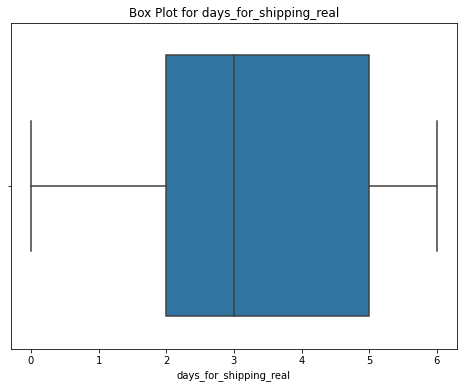

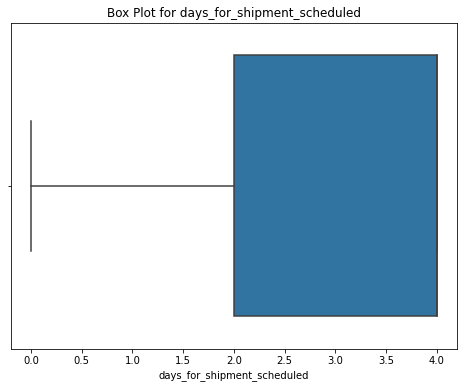

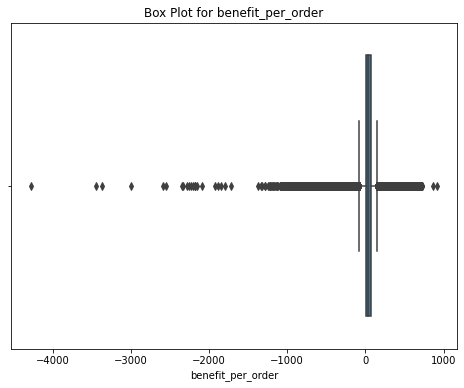

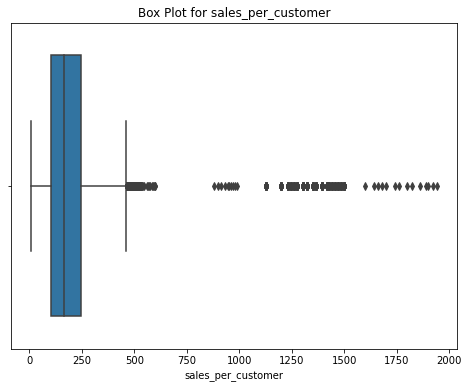

Skipping 'delivery_status' because it contains non-numeric data.


<Figure size 576x432 with 0 Axes>

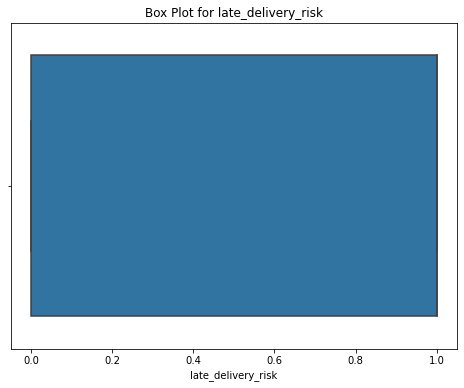

Skipping 'category_id' because it contains non-numeric data.
Skipping 'category_name' because it contains non-numeric data.
Skipping 'customer_city' because it contains non-numeric data.
Skipping 'customer_country' because it contains non-numeric data.
Skipping 'customer_email' because it contains non-numeric data.
Skipping 'customer_first_name' because it contains non-numeric data.
Skipping 'customer_id' because it contains non-numeric data.
Skipping 'customer_last_name' because it contains non-numeric data.
Skipping 'customer_password' because it contains non-numeric data.
Skipping 'customer_segment' because it contains non-numeric data.
Skipping 'customer_state' because it contains non-numeric data.
Skipping 'customer_street' because it contains non-numeric data.
Skipping 'customer_zipcode' because it contains non-numeric data.
Skipping 'department_id' because it contains non-numeric data.
Skipping 'department_name' because it contains non-numeric data.


<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

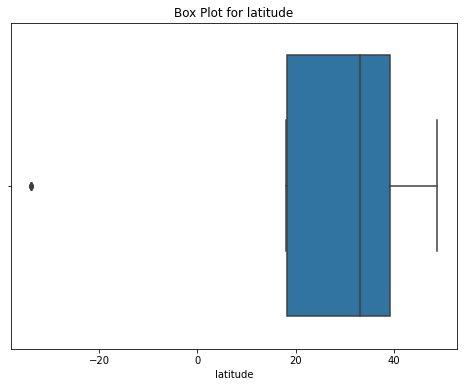

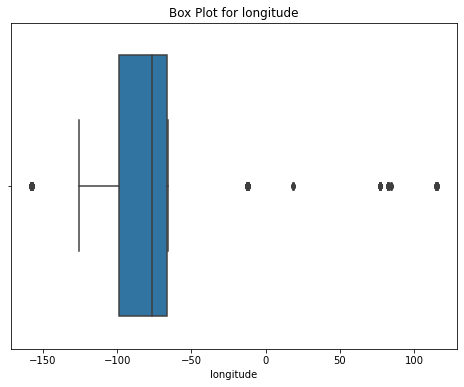

Skipping 'market' because it contains non-numeric data.
Skipping 'order_city' because it contains non-numeric data.
Skipping 'order_country' because it contains non-numeric data.
Skipping 'order_customer_id' because it contains non-numeric data.
Skipping 'order_date_date_orders' because it contains non-numeric data.
Skipping 'order_id' because it contains non-numeric data.
Skipping 'order_item_carprod_id' because it contains non-numeric data.


<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

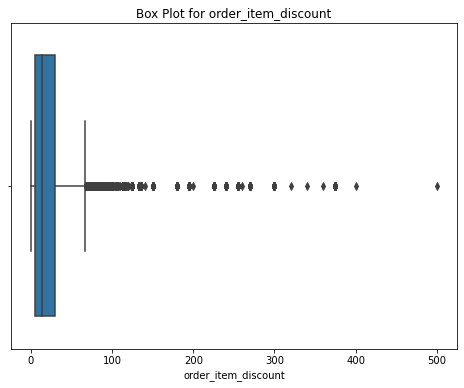

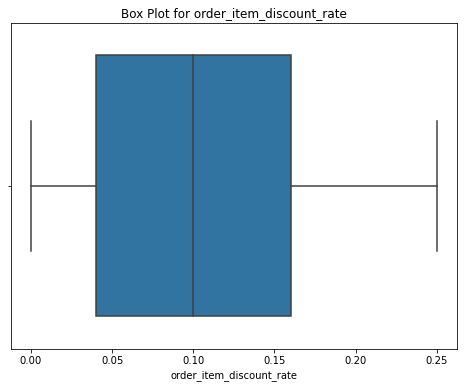

Skipping 'order_item_id' because it contains non-numeric data.


<Figure size 576x432 with 0 Axes>

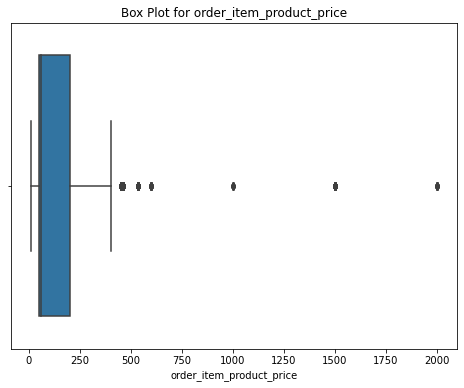

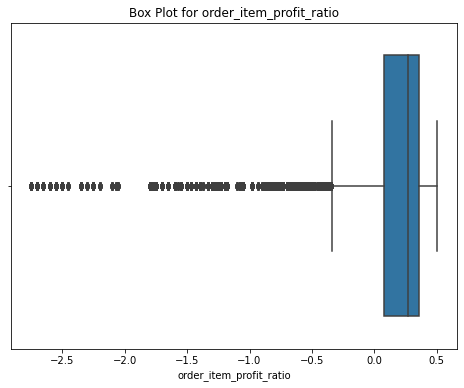

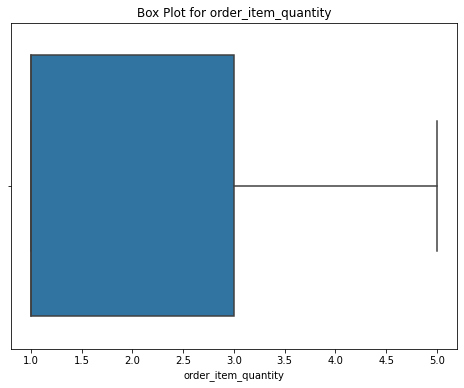

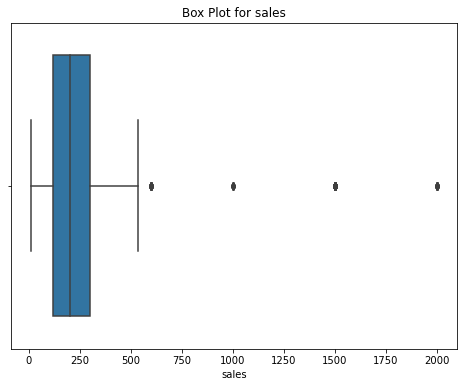

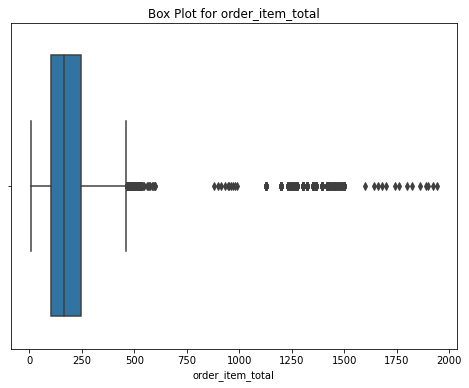

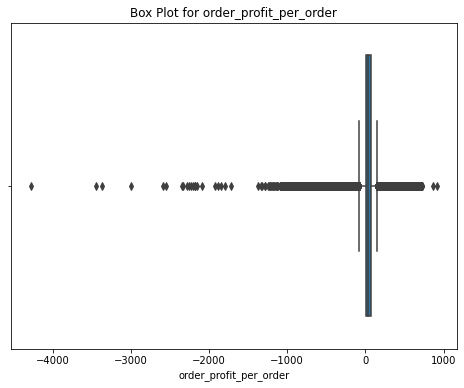

In [ ]:
columns_to_plot = [
    'type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_email', 'customer_first_name',
       'customer_id', 'customer_last_name', 'customer_password',
       'customer_segment', 'customer_state', 'customer_street',
       'customer_zipcode', 'department_id', 'department_name', 'latitude',
       'longitude', 'market', 'order_city', 'order_country',
       'order_customer_id', 'order_date_date_orders', 'order_id',
       'order_item_carprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_item_total', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'order_zipcode', 'product_card_id',
       'product_category_id', 'product_image', 'product_name', 'product_price',
       'product_status', 'shipping_date_date_orders', 'shipping_mode'
]


skewness_and_outliers = pd.DataFrame(columns=['Column', 'Skewness', 'Outliers'])


def count_outliers(column_data, threshold=1.5):
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return len(column_data[(column_data < lower_bound) | (column_data > upper_bound)])


for column in columns_to_plot:
    try:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=column, data=data)
        plt.title(f'Box Plot for {column}')
        plt.xlabel(column)
        plt.show()

        
        skew_val = skew(data[column])

        
        num_outliers = count_outliers(data[column])

        
        skewness_and_outliers = skewness_and_outliers.append({'Column': column, 'Skewness': skew_val, 'Outliers': num_outliers}, ignore_index=True)
    except TypeError:
        print(f"Skipping '{column}' because it contains non-numeric data.")


print(skewness_and_outliers)




The following findings are based on the information provided in the table:





### Skewness
- `benefit_per_order` has a strong left skew, indicating most values are on the lower end.
- `sales_per_customer` is right-skewed, with most values concentrated on the higher side.
- `order_item_discount`, `order_item_product_price`, `order_item_total`, `sales`, and `product_price` are also right-skewed, with a concentration of values on the higher end.
- `order_item_profit_ratio` is moderately left-skewed.

### Outliers
- Columns like `benefit_per_order`, `order_item_discount`, `order_item_product_price`, `order_item_total`, and `product_price` have a significant number of outliers.
- `sales` has 488 outliers, indicating extreme values.
- `longitude` stands out with 1,414 outliers.
- `order_item_discount_rate` and `product_status` have no outliers.
- Other columns exhibit a smaller number of outliers.



Skewness measures the asymmetry of a probability distribution. There are three common types of skewness:

- **Positive Skewness (Right Skew):** In a positively skewed distribution, the tail on the right-hand side (greater values) is longer or fatter than the left-hand side (smaller values). The mean is typically greater than the median.

![Positive Skewness](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/500px-Negative_and_positive_skew_diagrams_%28English%29.svg.png)

- **Negative Skewness (Left Skew):** In a negatively skewed distribution, the tail on the left-hand side (smaller values) is longer or fatter than the right-hand side (greater values). The mean is typically less than the median.

![Negative Skewness](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Positive_and_negative_skew_diagrams_%28annotated%29.png/400px-Positive_and_negative_skew_diagrams_%28annotated%29.png)

- **Zero Skewness:** A perfectly symmetric distribution has zero skewness, meaning the data is evenly distributed around the mean, and the tails on both sides are of equal length.




Outliers are data points that deviate significantly from the majority of the data in a dataset. They can be exceptionally high or low values compared to the rest of the data. Outliers can be genuine data points with valuable information or errors in data collection.

Interpreting Outliers:
- Outliers can indicate unusual or rare events in data.
- They may highlight errors in data collection or data entry.
- Outliers can influence summary statistics such as the mean and standard deviation, potentially leading to biased estimates.
- When building predictive models, it's important to consider whether to include or remove outliers based on domain knowledge and the impact they have on the model's performance.

**CORRELATION ANALYSIS**

In [ ]:



plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')


plt.show()


correlation_matrix = data.corr()


positive_threshold = 0.5
negative_threshold = -0.5


positive_correlations = []
negative_correlations = []
weak_correlations = []


for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        column1 = correlation_matrix.columns[i]
        column2 = correlation_matrix.columns[j]

        if correlation > positive_threshold:
            positive_correlations.append((column1, column2, correlation))
        elif correlation < negative_threshold:
            negative_correlations.append((column1, column2, correlation))
        else:
            weak_correlations.append((column1, column2, correlation))


positive_table = tabulate(positive_correlations, headers=['Column 1', 'Column 2', 'Correlation'], tablefmt='fancy_grid')
negative_table = tabulate(negative_correlations, headers=['Column 1', 'Column 2', 'Correlation'], tablefmt='fancy_grid')
weak_table = tabulate(weak_correlations, headers=['Column 1', 'Column 2', 'Correlation'], tablefmt='fancy_grid')


print("\nPairs with Positive Correlation:")
print(positive_table)
print("\nPairs with Negative Correlation:")
print(negative_table)
print("\nPairs with Weak Correlation:")
print(weak_table)

- **Positive Correlations**: Positive correlations are shown in warmer colors (closer to 1.0). These indicate that when one variable increases, the other tends to increase as well.

- **Negative Correlations**: Negative correlations are shown in cooler colors (closer to -1.0). These indicate that when one variable increases, the other tends to decrease.

- **Weak Correlations**: Values closer to 0.0 suggest weak or no linear correlation between variables.


### Findings from Heatmap:
Columns that are similar with same values but with different metadata (duplicate columns)

1. benefit_per_order , order_profit_per_order
2. sales_per_customer, sales, order_item_total
3. order_item_product_price, product_price


**PRODUCT PRICE DISTRIBUTION**

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data['product_price'], bins=100, kde=True)
plt.title('Product Price Distribution')
plt.xlabel('Product Price')
plt.ylabel('Frequency')
plt.show()

It seems the histogram are not normally distributed. So, we run the Central Limit Theorem to get better insight

**The central limit theorem (CLT)** states that the distribution of sample means approximates a normal distribution as the sample size gets larger, regardless of the population's distribution


**POWER ANALYSIS** :  The concept of statistical power is more associated with sample size, the power of the study increases with an increase in sample size. Ideally, minimum power of a study required is 80%. Hence, the sample size calculation is critical and fundamental for designing a study protocol

In [ ]:



effect_size = 0.5  # Desired effect size
alpha = 0.05       # Significance level
power = 0.8        # Desired power

# Calculate the required sample size
analysis = sms.TTestIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')

# Round up to the nearest integer, as sample size must be a whole number
sample_size = int(np.ceil(sample_size))

print(f"Required Sample Size: {sample_size}")


In [ ]:
product_prices = data['product_price']


sample_means = []
sample_size = 64  
num_samples = 15000  


for _ in range(num_samples):
    sample = np.random.choice(product_prices, size=sample_size)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)


plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, density=True, alpha=0.5, color='blue')
plt.title('Sampling Distribution of Product Price Means (Sample Size = 64)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()


sampling_dist_stats = pd.DataFrame({
    'Variable': ['Product Price Means'],
    'Mean': [np.mean(sample_means)],
    'Standard Error': [np.std(sample_means) / np.sqrt(sample_size)]
})


print(sampling_dist_stats)

**PRODUCT PRICE VARIATION BY PRODUCT NAME**

In [ ]:
price_by_product_name = data.groupby('product_name')['product_price'].describe().reset_index()
price_by_product_name = price_by_product_name.round(2)  # Round to two decimal places

# Sort the DataFrame by the mean product price in descending order
price_by_product_name = price_by_product_name.sort_values(by='mean', ascending=False)

# Print the table using tabulate
print(tabulate(price_by_product_name, headers='keys', tablefmt='pretty', showindex=False))

**PRODUCT PRICE VARIATION BY CATEGORY NAME**

In [ ]:
price_by_category_name = data.groupby('category_name')['product_price'].describe().reset_index()
price_by_category_name = price_by_category_name.round(2)  # Round to two decimal places

# Sort the DataFrame by the mean product price in descending order
price_by_category_name = price_by_category_name.sort_values(by='mean', ascending=False)

# Print the table using tabulate
print(tabulate(price_by_category_name, headers='keys', tablefmt='pretty', showindex=False))

Findings:

1. **Price Variation within Categories:**
   - The table provides a breakdown of price statistics, showing variations in mean, minimum, maximum, and quartile prices within different product categories.

2. **Stable Pricing in Specific Categories:**
   - Some categories, such as "Computers" and "Garden," exhibit consistent pricing with low price variation (low standard deviation), indicating stability in these markets.

3. **Price Fluctuations in Niche Categories:**
   - Niche categories like "Strength Training" and "Cameras" have higher price variations, suggesting that supply chain managers need to adapt to changing market dynamics and consumer preferences.

4. **Uniform Pricing in Others:**
   - Certain categories, like "Fishing" and "Crafts," maintain a uniform price across products. This uniformity can be leveraged for supply chain planning.



**SALES DISTRIBUTION**

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [ ]:
sales_ = data['sales']


sample_means = []
sample_size = 64  
num_samples = 15000  


for _ in range(num_samples):
    sample = np.random.choice(sales_, size=sample_size)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)


plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, density=True, alpha=0.5, color='blue')
plt.title('Sampling Distribution of Sales Means (Sample Size = 64)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()


sampling_dist_stats = pd.DataFrame({
    'Variable': ['Sales Means'],
    'Mean': [np.mean(sample_means)],
    'Standard Error': [np.std(sample_means) / np.sqrt(sample_size)]
})


print(sampling_dist_stats)

**SALES BY PRODUCT NAME**

In [ ]:
sales_by_product_name = data.groupby('product_name')['sales'].describe().reset_index()
sales_by_product_name = sales_by_product_name.round(2)  # Round to two decimal places

# Sort the DataFrame by the mean product price in descending order
sales_by_product_name = sales_by_product_name.sort_values(by='mean', ascending=False)

# Print the table using tabulate
print(tabulate(sales_by_product_name, headers='keys', tablefmt='pretty', showindex=False))

Findings:

1. **Product Variability**: Most products have very little variability in their prices (indicated by a standard deviation of 0.0). This suggests that these products are consistently sold at the same price without any discounts or fluctuations.

2. **Common Price Point**: Many products have a 'mean' (average) price close to a particular value, such as $199.99 or $299.99. This could indicate a common price point for those products in the market.

3. **Diverse Pricing**: Some products like 'The North Face Women's Recon Backpack' or 'LIJA Women's Mid-Length Panel Golf Shorts' have more varied pricing, with a significant 'std' (standard deviation). This suggests that these products might have different variations or models with different price ranges.

4. **Different Sales Volumes**: The 'count' column shows the number of times each product was sold. It varies widely across products, with some products having just a few sales, while others have much higher sales volume. This could be due to factors like popularity, seasonality, or marketing efforts.

5. **Potential for Bulk Sales**: Products like 'First aid kit' and 'Baby sweater' have a 'count' that matches their 'std' and 'min' values. This could indicate that they were sold in large quantities at a consistent price.

6. **Price Ranges**: The 'min' and 'max' values show the lowest and highest prices observed for each product. Some products have a consistent price (min and max are the same), while others have a range of prices.

7. **Different Markets**: The data includes a wide range of products, from sporting goods to clothing, electronics, and more. This suggests a diverse market with various consumer interests.



**SALES BY CATEGORY NAME**

In [ ]:
sales_by_category_name = data.groupby('category_name')['sales'].describe().reset_index()
sales_by_category_name = sales_by_category_name.round(2)  # Round to two decimal places

# Sort the DataFrame by the mean product price in descending order
sales_by_category_name = sales_by_category_name.sort_values(by='mean', ascending=False)

# Print the table using tabulate
print(tabulate(sales_by_category_name, headers='keys', tablefmt='pretty', showindex=False))

Findings:

1. **Demand Variation**: The table shows significant differences in sales count across various product categories. Some categories have high sales counts, while others have lower sales. This necessitates an efficient supply chain strategy to meet varying demand.

2. **Product Diversity**: The wide range of product categories highlights the need for supply chain managers to handle diverse product lines. Each category may have unique requirements, requiring tailored supply chain strategies.

3. **Supply Consistency**: Categories like "Computers," "Garden," and "Crafts" exhibit consistent sales counts, allowing for more predictable supply chain planning and inventory management.

4. **Market Dynamics**: Fluctuations in sales counts across categories require supply chain managers to stay agile and adaptable, adjusting procurement and logistics according to market dynamics.

5. **Strategic Sourcing**: Understanding categories with high sales volumes informs strategic sourcing decisions. Ensuring a reliable supply of products with high demand is crucial to prevent stockouts.

6. **Resource Allocation**: Allocate resources (e.g., storage space, labor, transportation) according to the demand of each product category to optimize resource utilization.

7. **Inventory Management**: Categories with higher sales counts might require more frequent restocking and closer monitoring of inventory levels to avoid shortages and overstock situations.



**SALES BY DEPARTMENT**

In [ ]:
data.columns

In [ ]:
departments = data['department_name'].unique()

# Create subplots with 3 categories per graph
fig, axes = plt.subplots(nrows=len(departments) // 3 + 1, ncols=3, figsize=(20, 18))
fig.suptitle('Distribution of Sales Across Different Departments (Violin Plots)', fontsize=16)

for i, department in enumerate(departments):
    row, col = i // 3, i % 3
    ax = axes[row, col]

    # Filter data for the current department
    department_data = data[data['department_name'] == department]

    # Create a violin plot for the current department
    sns.violinplot(x='department_name', y='sales', data=department_data, palette='Set3', ax=ax)
    ax.set_title(department)
    ax.set_xlabel('Department')
    ax.set_ylabel('Sales')
    ax.set_xticklabels([])
    ax.tick_params(axis='x', labelrotation=45)

# Remove any empty subplots
for i in range(len(departments), len(axes.flat)):
    fig.delaxes(axes.flat[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:

sales_by_department_name = data.groupby('department_name')['sales'].describe().reset_index()
sales_by_department_name = sales_by_department_name.round(2)  # Round to two decimal places

# Sort the DataFrame by the mean product price in descending order
sales_by_department_name = sales_by_department_name.sort_values(by='mean', ascending=False)

# Print the table using tabulate
print(tabulate(sales_by_department_name, headers='keys', tablefmt='pretty', showindex=False))

Findings:

1. **Technology Department**: The department exhibits a high average sales value, suggesting strong demand for technology products. However, it also has a relatively high standard deviation, indicating variability in sales. Supply chain managers should be prepared to adapt to fluctuations in demand.

2. **Health and Beauty Department**: Sales in this department are consistent and stable with no standard deviation. This implies a steady demand for health and beauty products. Efficient inventory management and supply chain optimization are essential.

3. **Footwear Department**: Sales of footwear products vary widely, indicating the need for flexible inventory and distribution strategies to accommodate different demand patterns.

4. **Fan Shop Department**: Sales in the Fan Shop department range from low to very high values. Supply chain managers should develop agile supply chain strategies to meet fluctuating demand for fan-related products.

5. **Apparel Department**: Sales in the Apparel department show moderate variability. Supply chain managers must fine-tune inventory strategies to match the changing demand for clothing.

6. **Fitness Department**: Sales in the Fitness department have a moderate standard deviation. Supply chain managers should maintain flexibility in logistics to address variations in demand for fitness products.

7. **Golf Department**: Golf products show moderate sales variability. Supply chain managers should plan for fluctuations in demand and optimize inventory management.

8. **Outdoors Department**: Sales in the Outdoors department exhibit a wide range of values with a high standard deviation. Careful monitoring and inventory management are necessary.

9. **Discs Shop Department**: Discs sales have a wide range with high variability. Dynamic inventory strategies and demand forecasting are crucial for different types of discs.

10. **Pet Shop Department**: Sales in the Pet Shop department are consistent with no standard deviation. Stable inventory levels are essential for pet-related products.

11. **Book Shop Department**: The Book Shop department also demonstrates stable sales patterns with no standard deviation. Consistent inventory and distribution should be prioritized.



**PRICE VS SALES**

In [ ]:
data.plot(x='product_price', y='sales',linestyle='dotted',
     markerfacecolor='blue', markersize=12) 
plt.title('Product Price vs Sales')#title
plt.xlabel('Product Price')  # X-axis title
plt.ylabel('Sales') # Y=axis title
plt.show()

It can be observed that prices has linear relation with sales.

**PROFIT OF ORDERS PER COUNTRY**

In [ ]:
df_geo=data.groupby([ 'order_country', 'order_city'])['order_profit_per_order'].sum().reset_index(name='Profit of Orders').sort_values(by= 'Profit of Orders', ascending= False)

df_geo.head(10)

In [ ]:
fig = px.choropleth(df_geo ,  locationmode='country names', locations='order_country',
                    color='Profit of Orders', # lifeExp is a column of data
                    hover_name='order_country', 
                    
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

**SALES PER COUNTRY**

In [ ]:
df_sales=data.groupby([ 'order_country', 'order_city'])['sales'].sum().reset_index(name='Sales Per Country').sort_values(by= 'Sales Per Country', ascending= False)

df_sales.head(10)

In [ ]:
fig = px.choropleth(df_sales ,  locationmode='country names', locations='order_country',
                    color='Sales Per Country', # lifeExp is a column of data
                    hover_name='order_country', 
                    #hover_data ='order_city',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

In [ ]:
px.bar(df_sales.head(20), x='Sales Per Country',y = 'order_country',color ='Sales Per Country')


**TIME SERIES ANALYSIS**

In [ ]:
data['order_year'] = pd.DatetimeIndex(data['order_date_date_orders']).year
data['order_month'] = pd.DatetimeIndex(data['order_date_date_orders']).month
data['order_week_day'] = pd.DatetimeIndex(data['order_date_date_orders']).day_name()  
#data['order_date'] = pd.DatetimeIndex(data['order_date_date_orders']).date
data['order_date'] = pd.to_datetime(data['order_date_date_orders'])

data['order_hour'] = pd.DatetimeIndex(data['order_date_date_orders']).hour
data['order_month_year'] = pd.to_datetime(data['order_date_date_orders']).dt.to_period('M')
data['year_week']= data['order_date'].dt.to_period('W')


**1. FISCAL QUARTERS**

In [ ]:
quater= data.groupby('order_month_year')
quartersales=quater['sales'].sum().resample('Q').mean().plot(figsize=(15,6))

Findings:

1. Sales were consistent from Q1 of 2015 until Q3 of 2017
2. Sales start dipped by Q1 of 2018

**2. PURCHASE TREND IN WEEKS DAYS,HOURS AND MONTHS**

In [ ]:
plt.figure(figsize=(10,12))
plt.subplot(4, 2, 1)
quater= data.groupby('order_year')
quater['sales'].mean().plot(figsize=(20,20),title='Average sales for 3 years')
plt.subplot(4, 2, 2)
days=data.groupby("order_week_day")
days['sales'].mean().plot(figsize=(20,20),title='Average sales per week in days')
plt.subplot(4, 2, 3)
hrs=data.groupby("order_hour")
hrs['sales'].mean().plot(figsize=(20,20),title='Average sales per day in hrs')
plt.subplot(4, 2, 4)
mnth=data.groupby("order_month")
mnth['sales'].mean().plot(figsize=(20,20),title='Average sales per year in mnths')
plt.tight_layout()
plt.show()

Findings:

1. Highest number of orders are placed by customers in 2017.
2. Saturday recorded highest number of average sales and wednesday with the least number of sales.
3. The average sales are consistent throughout the day irrespective of time with std of 3.
4. The most number of orders came in October followed by November, and orders for all other months are consistent.

# DEMAND FORECASTING

**MODEL BUILDING**

In [ ]:
weekly_orders = data.groupby('year_week')['order_item_quantity'].sum()

In [ ]:



weekly_orders_df = weekly_orders.reset_index()
weekly_orders_df.columns = ['ds', 'y']


weekly_orders_df['ds'] = weekly_orders_df['ds'].dt.to_timestamp()


split_point = int(len(weekly_orders_df) * 0.80)
train = weekly_orders_df.iloc[:split_point]
test = weekly_orders_df.iloc[split_point:]


weekly_model = Prophet()
weekly_model.fit(train)


weekly_future = weekly_model.make_future_dataframe(periods=len(test), freq='W-SUN')


weekly_forecast = weekly_model.predict(weekly_future)


**MODEL EVALUATION**

In [ ]:


# Calculate and define the metrics
y_pred_train = weekly_forecast['yhat'][:split_point]
mae_train = mean_absolute_error(train['y'], y_pred_train)
mse_train = mean_squared_error(train['y'], y_pred_train)
rmse_train = np.sqrt(mse_train)

# Calculate and define testing metrics
y_pred_test = weekly_forecast['yhat'][split_point:]
mae_test = mean_absolute_error(test['y'], y_pred_test)
mse_test = mean_squared_error(test['y'], y_pred_test)
rmse_test = np.sqrt(mse_test)

# Training metrics
training_metrics = [
    ["MAE (Training)", mae_train],
    ["MSE (Training)", mse_train],
    ["RMSE (Training)", rmse_train]
]

# Testing metrics
testing_metrics = [
    ["MAE (Testing)", mae_test],
    ["MSE (Testing)", mse_test],
    ["RMSE (Testing)", rmse_test]
]

# Print tabulated metrics
print("Training Metrics:")
print(tabulate(training_metrics, headers=["Metric", "Value"], tablefmt="pretty"))
print("\nTesting Metrics:")
print(tabulate(testing_metrics, headers=["Metric", "Value"], tablefmt="pretty"))


**MODEL FORECAST**

In [ ]:
# Plot the forecast
weekly_fig1 = weekly_model.plot(weekly_forecast)
plt.title('Weekly Orders Forecast')
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.show()




In [ ]:
# Plot the components of the forecast
weekly_fig2 = weekly_model.plot_components(weekly_forecast)
plt.show()

**ACTUAL VS PREDICTED VALUE**

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(train['ds'], train['y'], label='Training Data', color='blue')
plt.plot(test['ds'], test['y'], label='Actual Test Data', color='orange')
plt.plot(train['ds'], y_pred_train, label='Predicted Training Data', color='red', linestyle='--')
plt.plot(test['ds'], y_pred_test, label='Predicted Test Data', color='green', linestyle='--')
plt.title('Actual vs Predicted Weekly Orders')
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.legend()
plt.grid(True)
plt.show()

**FINDINGS**

In [ ]:
weekly_orders_df.describe()

1. Mean Absolute Error (MAE): The model's predictions deviate by an average of 1217.76 units from the actual weekly orders.
   Given the average weekly orders of 2,370, this represents an error of about 5.2%.

2. Root Mean Squared Error (RMSE): The RMSE of 1574.71 suggests that there are instances where the model's predictions have
   larger deviations from the actual values. This is slightly higher than the standard deviation of the data, indicating the
   model might be missing some variability.

# INVENTORY OPTIMIZATION

In [ ]:
import numpy as np


# Define your inputs (adjust as needed)
forecasted_demand = weekly_forecast['yhat']
lead_time_column = data['days_for_shipping_real']  # Use 'days_for_shipping_real' as lead time
demand_std_dev = np.std(weekly_orders_df['y'])

# Set your desired service level (probability of not stocking out)
service_level = 0.95  # Example: 95% service level

# Calculate the z-score for the service level
z_score = norm.ppf(service_level)

# Calculate safety stock
safety_stock = z_score * demand_std_dev

# Calculate reorder point
reorder_point = forecasted_demand + (safety_stock * np.sqrt(lead_time_column))

# Print the results
print(f"Forecasted Demand: {forecasted_demand.values[0]:.2f}")
print(f"Lead Time (in days): 'days_for_shipping_real'")
print(f"Demand Standard Deviation: {demand_std_dev:.2f}")
print(f"Desired Service Level: {service_level * 100}%")
print(f"Z-Score (for the service level): {z_score:.2f}")
print(f"Safety Stock: {safety_stock:.2f}")
print(f"Reorder Point: {reorder_point.values[0]:.2f}")


In [ ]:
weekly_forecast = weekly_forecast.merge(train[['ds', 'y']], on='ds', how='left')
weekly_forecast = weekly_forecast.merge(test[['ds', 'y']], on='ds', how='left', suffixes=('', '_test'))
weekly_forecast['y'].fillna(weekly_forecast['y_test'], inplace=True)
weekly_forecast.drop(columns='y_test', inplace=True)

# Calculate weekly standard deviation of actual demand
weekly_forecast['std_dev'] = weekly_forecast['y'].rolling(window=7).std()

# Calculate weekly safety stock
weekly_forecast['safety_stock'] = 1.65 * weekly_forecast['std_dev'] * np.sqrt(1)

# Calculate weekly average demand from actual data
weekly_forecast['avg_weekly_demand'] = weekly_forecast['y'].rolling(window=7).mean()

# Calculate weekly reorder point
weekly_forecast['reorder_point'] = (weekly_forecast['avg_weekly_demand'] * 1) + weekly_forecast['safety_stock']

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(weekly_forecast['ds'], weekly_forecast['y'], label='Actual Demand', color='blue')
plt.plot(weekly_forecast['ds'], weekly_forecast['yhat'], label='Predicted Demand', color='green')
plt.plot(weekly_forecast['ds'], weekly_forecast['safety_stock'], label='Safety Stock', color='red', linestyle='--')
plt.plot(weekly_forecast['ds'], weekly_forecast['reorder_point'], label='Reorder Point', color='orange', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Demand with Safety Stock and Reorder Point')
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.show()


In [ ]:
# Calculate weekly standard deviation of forecasted demand
weekly_forecast['forecasted_std_dev'] = weekly_forecast['yhat'].rolling(window=7).std()

# Calculate weekly safety stock for forecasted demand
weekly_forecast['forecasted_safety_stock'] = 1.65 * weekly_forecast['forecasted_std_dev'] * np.sqrt(1)

# Calculate weekly average demand from forecasted data
weekly_forecast['forecasted_avg_weekly_demand'] = weekly_forecast['yhat'].rolling(window=7).mean()

# Calculate weekly reorder point for forecasted demand
weekly_forecast['forecasted_reorder_point'] = (weekly_forecast['forecasted_avg_weekly_demand'] * 1) + weekly_forecast['forecasted_safety_stock']

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(weekly_forecast['ds'], weekly_forecast['y'], label='Actual Demand', color='blue')
plt.plot(weekly_forecast['ds'], weekly_forecast['yhat'], label='Predicted Demand', color='green')
plt.plot(weekly_forecast['ds'], weekly_forecast['safety_stock'], label='Safety Stock (Actual)', color='red', linestyle='--')
plt.plot(weekly_forecast['ds'], weekly_forecast['forecasted_safety_stock'], label='Safety Stock (Forecasted)', color='purple', linestyle='--')
plt.plot(weekly_forecast['ds'], weekly_forecast['reorder_point'], label='Reorder Point (Actual)', color='orange', linestyle='--')
plt.plot(weekly_forecast['ds'], weekly_forecast['forecasted_reorder_point'], label='Reorder Point (Forecasted)', color='pink', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Demand with Safety Stock and Reorder Point')
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.show()